In [18]:
import pandas as pd
import glob
import os
import numpy as np




In [19]:
path = os.path.join('/mnt/c', 'Users', 'Tobi', 'Desktop', 'Uni', 'Bachaelorarbeit', 'Projekte', 'Tensorflow 2.0', '2023')
print("Pfad existiert:", os.path.exists(path))

Pfad existiert: True


In [20]:
# Liste aller CSV-Dateien im Verzeichnis 2023
csv_files = glob.glob(os.path.join('/mnt/c', 'Users', 'Tobi', 'Desktop', 'Uni', 'Bachaelorarbeit', 'Projekte', 'Tensorflow 2.0', '2023', '2023_*sortiert.csv'))

# Liste zum Speichern aller DataFrames
all_dataframes = []

# Schleife für jede CSV-Datei
for csv_file in csv_files:
    
    df = pd.read_csv(csv_file, sep=';', decimal=',')
    #Spalten hinzufügen
    all_dataframes.append(df)

# Kombinierte DataFrames 
energy_df = pd.concat(all_dataframes, ignore_index=True)


energy_df

,Abgang,Time,L1,L2,L3
0,1,31.01.2023 13:42,165032,99682,133860
1,2,31.01.2023 13:42,42210,43358,40527
2,3,31.01.2023 13:42,24618,42478,49083
3,4,31.01.2023 13:42,91073,65532,117982
4,5,31.01.2023 13:42,56432,55952,77772
...,...,...,...,...,...
2609896,2,30.11.2023 13:20,28936,38352,30685
2609897,3,30.11.2023 13:20,53257,33660,31531
2609898,4,30.11.2023 13:20,102295,97653,110773
2609899,5,30.11.2023 13:20,78043,56102,96547


In [21]:
print(energy_df.columns)


Index(['Abgang', ' Time', ' L1', ' L2', ' L3'], dtype='object')


In [22]:
energy_df.columns = energy_df.columns.str.strip()
energy_df.index = pd.to_datetime(energy_df['Time'], format='%d.%m.%Y %H:%M')
timestamp_s = energy_df.index.map(pd.Timestamp.timestamp)


In [23]:
day = 24*60*60
year = (365.2425)*day
hour = 60*60

# Timestamp-Spalte erstellen (falls benötigt)
energy_df['Time'] = energy_df.index

# Sinus/Cos hinzufügen
energy_df['hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
energy_df['hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
energy_df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
energy_df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
energy_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
energy_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# Wochentag hinzufügen
energy_df['wochentag'] = energy_df.index.dayofweek

energy_df

,Abgang,Time,L1,L2,L3,hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,wochentag
Time,,,,,,,,,,,,
2023-01-31 13:42:00,1,2023-01-31 13:42:00,165032,99682,133860,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,2,2023-01-31 13:42:00,42210,43358,40527,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,3,2023-01-31 13:42:00,24618,42478,49083,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,4,2023-01-31 13:42:00,91073,65532,117982,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,5,2023-01-31 13:42:00,56432,55952,77772,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 13:20:00,2,2023-11-30 13:20:00,28936,38352,30685,0.866025,-0.500000,-0.342020,-0.939693,-0.516335,0.856387,3
2023-11-30 13:20:00,3,2023-11-30 13:20:00,53257,33660,31531,0.866025,-0.500000,-0.342020,-0.939693,-0.516335,0.856387,3
2023-11-30 13:20:00,4,2023-11-30 13:20:00,102295,97653,110773,0.866025,-0.500000,-0.342020,-0.939693,-0.516335,0.856387,3


<function matplotlib.pyplot.show(close=None, block=None)>

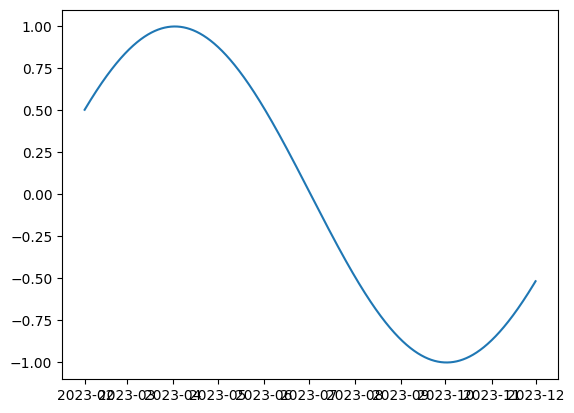

In [24]:
import matplotlib.pyplot as plt

#Plotten zum Test mit allen Spalten, zum Eingrenzen [:1000]
plt.plot(energy_df['Year sin'])
plt.show

In [25]:
print(energy_df.dtypes)

Abgang                int64
Time         datetime64[ns]
L1                    int64
L2                    int64
L3                    int64
hour sin            float64
hour cos            float64
Day sin             float64
Day cos             float64
Year sin            float64
Year cos            float64
wochentag             int32
dtype: object


In [26]:
#Prepare normalisation
max_L1_kW =energy_df['L1'].max()
max_L2_kW =energy_df['L2'].max()
max_L3_kW =energy_df['L3'].max()

print(max_L1_kW,max_L2_kW,max_L3_kW)

296012 271310 271491


In [27]:
#Normalisieren
energy_df['L1']= energy_df['L1'] / max_L1_kW
energy_df['L2']= energy_df['L2'] / max_L2_kW
energy_df['L3']= energy_df['L3'] / max_L3_kW

#Spalten löschen
columns_to_drop= ['Time'] 
energy_df=energy_df.drop(columns_to_drop, axis=1)

energy_df

,Abgang,L1,L2,L3,hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,wochentag
Time,,,,,,,,,,,
2023-01-31 13:42:00,1,0.557518,0.367410,0.493055,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,2,0.142596,0.159810,0.149276,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,3,0.083166,0.156566,0.180791,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,4,0.307667,0.241539,0.434571,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
2023-01-31 13:42:00,5,0.190641,0.206229,0.286463,-0.951057,-0.309017,-0.430511,-0.902585,0.504187,0.863594,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 13:20:00,2,0.097753,0.141359,0.113024,0.866025,-0.500000,-0.342020,-0.939693,-0.516335,0.856387,3
2023-11-30 13:20:00,3,0.179915,0.124065,0.116140,0.866025,-0.500000,-0.342020,-0.939693,-0.516335,0.856387,3
2023-11-30 13:20:00,4,0.345577,0.359931,0.408017,0.866025,-0.500000,-0.342020,-0.939693,-0.516335,0.856387,3


In [28]:
from sklearn.preprocessing import MinMaxScaler


# Aufteilung in Features und Labels
X = energy_df[['Abgang','L1','L2','L3','Day sin', 'Day cos', 'Year sin', 'Year cos','hour sin','hour cos','wochentag']]        #Wenn man Stromverbrauch rauslässt trotzdem gute Ergebnisse ,'temperatur_2019'
y = energy_df[['L1','L2','L3']]

# Normierung der Daten (z.B. Min-Max-Skalierung)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Sequenzbildung
sequence_length = 20                                                                                                          #Beispiel: Sequenzen von 10 aufeinander folgenden Zeitschritten
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - sequence_length):    
   X_sequences.append(X_scaled[i:i+sequence_length, :])
   y_sequences.append(y.iloc[i+sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
#Aufteilung in 30 Test 
# Festlegung der Größe für Training und Test
train_size = int(0.95 * len(X_sequences))
test_size = 2
val_size = len(X_sequences) - train_size - test_size

# Aufteilung in Trainings-, Validierungs- und Testdatensätze
X_train = X_sequences[:train_size]
y_train = y_sequences[:train_size]

X_val = X_sequences[train_size:train_size+val_size]
y_val = y_sequences[train_size:train_size+val_size]

X_test = X_sequences[train_size+val_size:train_size+val_size+test_size]
y_test = y_sequences[train_size+val_size:train_size+val_size+test_size]


# Überprüfen der Shape der Datensätze
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Validierungsdaten:", X_val.shape, y_val.shape)
print("Testdaten:", X_test.shape, y_test.shape)

Trainingsdaten: (2479386, 20, 11) (2479386, 3)
Validierungsdaten: (130493, 20, 11) (130493, 3)
Testdaten: (2, 20, 11) (2, 3)


In [29]:
#Funktion Definieren, sodass gesamte Spalte betrachtet und Stromverbrauch Ausgangswert
window_size = sequence_length

def df_to_X_y1(df, window_size=window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]            
    X.append(row)
    label = df_as_np[i+window_size][0]                      
    y.append(label)
  return np.array(X), np.array(y)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.optimizers import Adam


model_wahl_lstm=Sequential()
#7 Timestamps/Windowsize wird nicht besser mit mehr Windows  11 relevante Variablen
model_wahl_lstm.add(InputLayer(input_shape=(window_size,11)))  
model_wahl_lstm.add(LSTM(100, return_sequences=True))
model_wahl_lstm.add(LSTM(50))
model_wahl_lstm.add(Dense(16))
model_wahl_lstm.add(Dense(8, 'relu'))                       # Hochskalieren= Anzahl der Neuronen  erhöhen
# Ausgabewerte  1
model_wahl_lstm.add(Dense(3,'linear'))
model_wahl_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 100)           44800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 16)                816       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 75979 (296.79 KB)
Trainable params: 75979 (296.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model_wahl_lstm.compile(optimizer=optimizer, loss="MSE", metrics=["MAE"])
model_wahl_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=7500 )             #,callbacks=[cp]

Epoch 1/10
331/331 [==============================] - 8s 19ms/step - loss: 0.0399 - MAE: 0.1596 - val_loss: 0.0736 - val_MAE: 0.2213
Epoch 2/10
331/331 [==============================] - 6s 17ms/step - loss: 0.0283 - MAE: 0.1281 - val_loss: 0.0592 - val_MAE: 0.1923
Epoch 3/10
331/331 [==============================] - 6s 17ms/step - loss: 0.0216 - MAE: 0.1072 - val_loss: 0.0483 - val_MAE: 0.1689
Epoch 4/10
331/331 [==============================] - 6s 17ms/step - loss: 0.0169 - MAE: 0.0921 - val_loss: 0.0399 - val_MAE: 0.1496
Epoch 5/10
331/331 [==============================] - 6s 17ms/step - loss: 0.0135 - MAE: 0.0809 - val_loss: 0.0328 - val_MAE: 0.1311
Epoch 6/10
331/331 [==============================] - 6s 17ms/step - loss: 0.0110 - MAE: 0.0725 - val_loss: 0.0274 - val_MAE: 0.1166
Epoch 7/10
331/331 [==============================] - 6s 17ms/step - loss: 0.0094 - MAE: 0.0676 - val_loss: 0.0235 - val_MAE: 0.1069
Epoch 8/10
331/331 [==============================] - 6s 17ms/step - 

77481/77481 [==============================] - 152s 2ms/step
Form von train_predictions vor der Umformung: (2479386, 3)
Form von train_predictions für Modell 1: (2479386,)
Form von train_predictions für Modell 2: (2479386,)
Form von train_predictions für Modell 3: (2479386,)


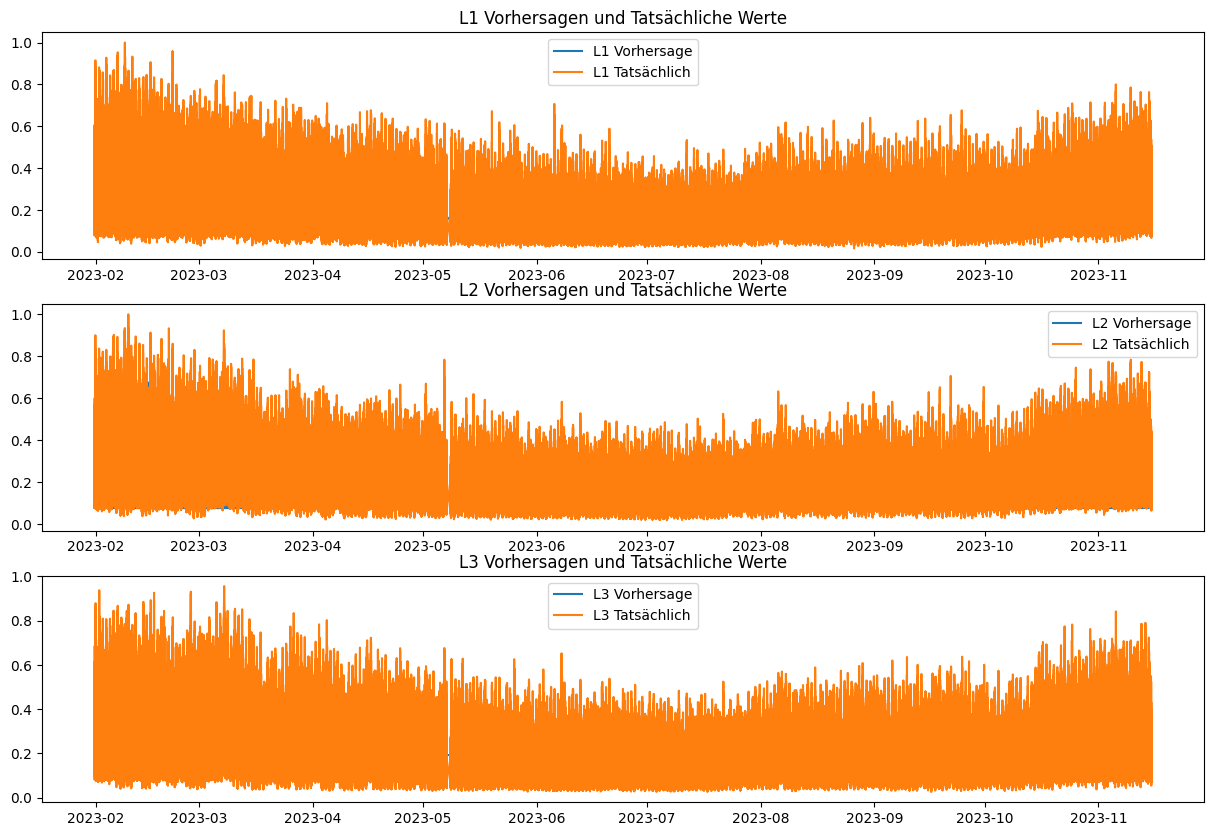

,Train Predictions L1,Train Predictions L2,Train Predictions L3,Actuals L1,Actuals L2,Actuals L3
0,60410.442289,58657.665108,52173.083294,90502.0,66571.0,91750.0
1,67740.980903,73133.768196,52016.371554,84312.0,57616.0,94713.0
2,77156.236187,91726.713448,51815.094242,121206.0,78846.0,100803.0
3,77502.149554,92409.806859,51807.699011,151786.0,122547.0,150301.0
4,41396.005074,21108.584586,52579.574219,31599.0,47807.0,48655.0
...,...,...,...,...,...,...
2479381,59549.672813,56957.847448,52191.486415,65156.0,43399.0,38400.0
2479382,41396.005074,21108.584586,52579.574219,29136.0,18943.0,27419.0
2479383,45718.316578,29644.145309,52487.170242,53462.0,37096.0,27251.0
2479384,57118.720779,52157.289277,52243.455308,74650.0,78087.0,77219.0


In [32]:
# Training anzeigen
train_predictions = model_wahl_lstm.predict(X_train)  # 3 Vorhersagen für jede Eingabesequenz
# Training anzeigen
train_predictions = model_wahl_lstm.predict(X_train)  # 3 Vorhersagen für jede Eingabesequenz
print("Form von train_predictions vor der Umformung:", train_predictions.shape)

# Überprüfung der Form für jedes Modell
for i in range(3):
    print(f"Form von train_predictions für Modell {i + 1}: {train_predictions[:, i].shape}")


# Rückgängig machen der Normalisierung für Plot
train_results_plot = pd.DataFrame(data={'Train Predictions L1': train_predictions[:, 0],
                                        'Train Predictions L2': train_predictions[:, 1],
                                        'Train Predictions L3': train_predictions[:, 2],
                                        'Actuals L1': y_train[:, 0],
                                        'Actuals L2': y_train[:, 1],
                                        'Actuals L3': y_train[:, 2]})

# Rückgängig machen der Normalisierung für Tabelle
train_results_table = train_results_plot.copy()
train_results_table[['Train Predictions L1', 'Actuals L1']] = train_results_table[['Train Predictions L1', 'Actuals L1']] * max_L1_kW
train_results_table[['Train Predictions L2', 'Actuals L2']] = train_results_table[['Train Predictions L2', 'Actuals L2']] * max_L2_kW
train_results_table[['Train Predictions L3', 'Actuals L3']] = train_results_table[['Train Predictions L3', 'Actuals L3']] * max_L3_kW

# Index anpassen für Plot
train_results_plot.index = energy_df.index[:train_size]

# Plot
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(train_results_plot[['Train Predictions L1', 'Actuals L1']])
plt.title('L1 Vorhersagen und Tatsächliche Werte')
plt.legend(['L1 Vorhersage', 'L1 Tatsächlich'])

plt.subplot(3, 1, 2)
plt.plot(train_results_plot[['Train Predictions L2', 'Actuals L2']])
plt.title('L2 Vorhersagen und Tatsächliche Werte')
plt.legend(['L2 Vorhersage', 'L2 Tatsächlich'])

plt.subplot(3, 1, 3)
plt.plot(train_results_plot[['Train Predictions L3', 'Actuals L3']])
plt.title('L3 Vorhersagen und Tatsächliche Werte')
plt.legend(['L3 Vorhersage', 'L3 Tatsächlich'])

plt.show()

# Tabelle anzeigen
train_results_table
